<a href="https://colab.research.google.com/github/ardilalukita14/PCVK-Genap-21-22/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIKUM 7**

### **TUGAS PRAKTIKUM**

Akses file yang terdapat pada drive.

In [112]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import library yang dibutuhkan.

In [113]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.





**Konvolusi tanpa library**

1. Citra masukan
2. Kernel berupa matriks untuk memfilter citra
3. nilai stride (besarnya pergeseran untuk setiap konvolusi)
4. nilai pad yang akan ditambahkan pada citra

In [114]:
def convolution2d(image, kernel, stride, padding):
  #Menerapkan perkaliang silang pada semua korelasi kernel menggunakan NumPy
  kernel = np.flipud(np.fliplr(kernel))

  #Menghitung ukuran kernel dan image pada dimensi (x, y)
  xkernelShape = kernel.shape[0]
  ykernelShape = kernel.shape[1]
  ximageShape = image.shape[0]
  yimageShape = image.shape[1]

  #Menghitung output konvolusion dari masing - masing dimensi (x dan y)
  xOutputConv = int(((ximageShape - xkernelShape + 2 * padding) / stride) + 1)
  yOutputConv = int(((yimageShape - ykernelShape + 2 * padding) / stride) + 1)

  #Membuat matriks
  outputMat = np.zeros((xOutputConv, yOutputConv))

  # Karena konvolusi merupakan metode yang akan menitikberatkan pada kondisi padding yang merata di setiap sisi.
  # Maka, kita lakukan pemeriksaan padding 

  if padding != 0:
    imagePad = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))   # meratakan padding ke seluruh sisi
    imagePad[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image   # menerapkan pada image asli
  else :
    imagePad = image  # jika tidak memiliki padding, maka dilakukan operasi berikut
  
  # Menerapkan proses konvolusi pada image
  for y in range(image.shape[1]):
        # Exit Konvolusi    
        if y > image.shape[1] - ykernelShape:                # Memeriksa apakah dimensi y dari gambar sudah selesai
            break
        # Langkah ini dilakukan ketika dimensi y sudah berada di akhir nilainya
        if y % stride == 0:
            for x in range(image.shape[0]):
                # Lanjut pada dimensi x atau baris pada kernel
                if x > image.shape[0] - xkernelShape:
                    break
                try:
                   # Langkah ini dilakukan ketika dimensi x sudah berada di akhir nilainya
                    if x % stride == 0:
                        outputMat[x, y] = (kernel * imagePad[x: x + xkernelShape, y: y + ykernelShape]).sum()       # operator konvolusi untuk menjumlahkan elemen dan menambahkan ke matriks
                except:
                    break

  return outputMat



Load citra yang akan diproses dan ubah menjadi citra keabuan.

In [115]:
# Load citra yang akan diproses dan ubah menjadi citra keabuan
img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

In [116]:
# Menentukan kernel yang akan digunakan
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

In [117]:
# Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan
convolution2d(img_gray, kernel_sharpen, 1, 2)

array([[   0., -145.,  -56., ...,    0.,    0.,    0.],
       [-145.,  553.,  -15., ...,    0.,    0.,    0.],
       [-116.,  257.,  179., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

Menampilkan hasil.

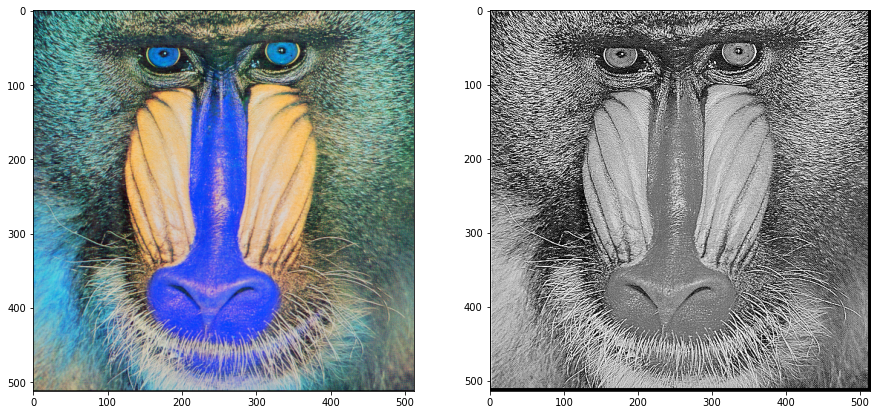

In [118]:
# Output gambar
imageModif = im.fromarray(convolution2d(img_gray, kernel_sharpen, 1, 2))
fig, ax = plt.subplots(1,2, figsize=(15,25))
ax[0].imshow(img)
ax[1].imshow(imageModif)

Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

**a. Average Filter**

In [119]:
# Menentukan kernel yang akan digunakan
kernel_averageFilter = np.array([[1, 1, 1],
                                 [1, 1, 1],
                                 [1, 1, 1]]) * (1/9)

In [120]:
# Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan
convolution2d(img_gray, kernel_averageFilter, 1, 2)

array([[16.11111111, 22.33333333, 27.77777778, ...,  0.        ,
         0.        ,  0.        ],
       [29.        , 46.44444444, 56.33333333, ...,  0.        ,
         0.        ,  0.        ],
       [37.55555556, 67.66666667, 82.66666667, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

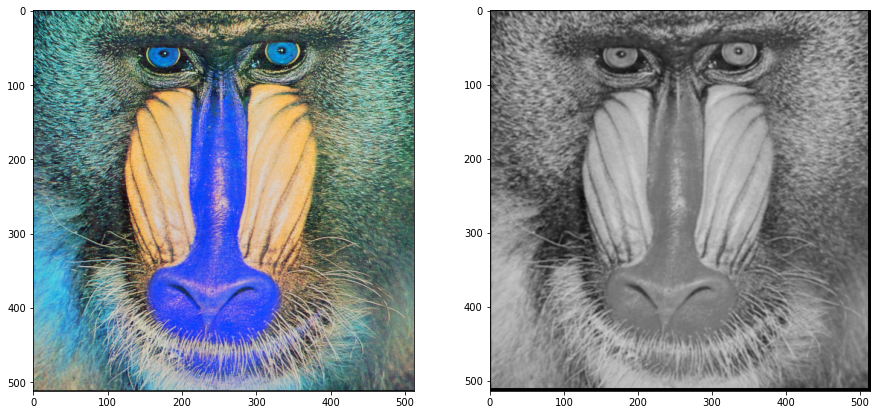

In [121]:
# Output gambar
imageAverage = im.fromarray(convolution2d(img_gray, kernel_averageFilter, 1, 2))
fig, ax = plt.subplots(1,2, figsize=(15,25))
ax[0].imshow(img)
ax[1].imshow(imageAverage, cmap='gray')

**b. Low Pass Filter**

In [122]:
# Menentukan kernel yang akan digunakan
kernel_lowPassFilter = np.array([[1, 1, 1],
                                 [1, 4, 1],
                                 [1, 1, 1]]) * (1/12)

In [123]:
# Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan
convolution2d(img_gray, kernel_lowPassFilter, 1, 2)

array([[12.08333333, 16.75      , 20.83333333, ...,  0.        ,
         0.        ,  0.        ],
       [21.75      , 71.08333333, 56.25      , ...,  0.        ,
         0.        ,  0.        ],
       [28.16666667, 79.75      , 87.25      , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

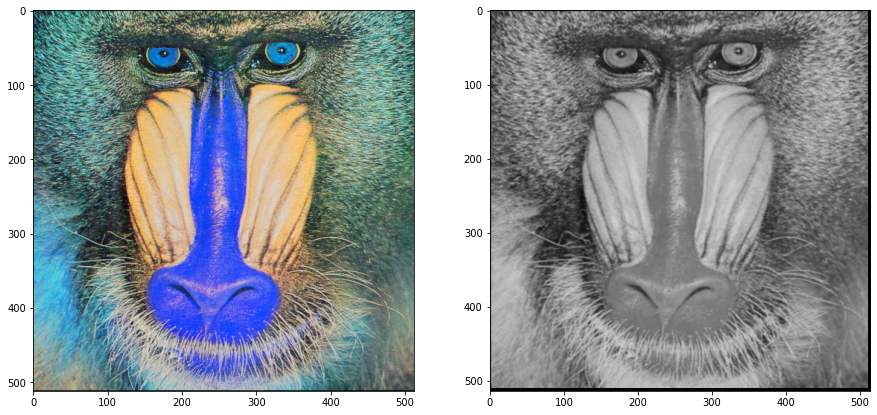

In [124]:
# Output gambar
imagelowPassFilter = im.fromarray(convolution2d(img_gray, kernel_lowPassFilter, 1, 2))
fig, ax = plt.subplots(1,2, figsize=(15,25))
ax[0].imshow(img)
ax[1].imshow(imagelowPassFilter, cmap='gray')

**c. High Pass Filter**

In [125]:
# Menentukan kernel yang akan digunakan
kernel_highPassFilter = np.array([[-1, 0, 1],
                                  [-1, 0, 3],
                                  [-3, 0, 1]])

In [126]:
# Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan
convolution2d(img_gray, kernel_highPassFilter, 1, 2)

array([[-145.,  -56.,   96., ...,    0.,    0.,    0.],
       [-261., -157.,  462., ...,    0.,    0.,    0.],
       [-628., -383.,  337., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

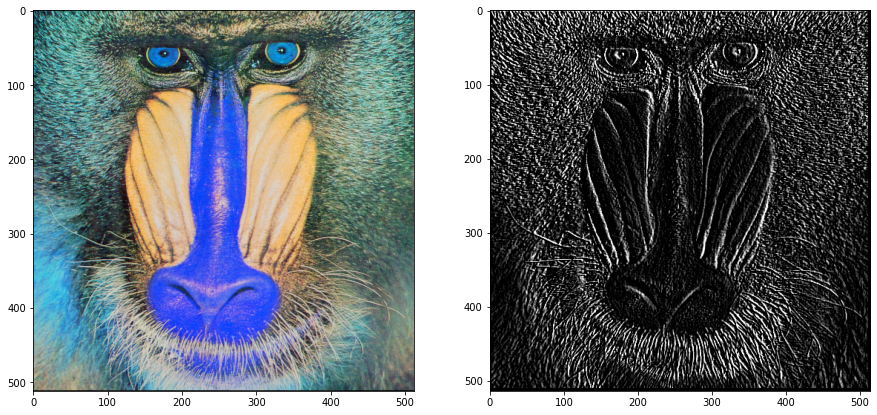

In [127]:
# Output gambar
imagehighPassFilter = im.fromarray(convolution2d(img_gray, kernel_highPassFilter, 1, 2))
fig, ax = plt.subplots(1,2, figsize=(15,25))
ax[0].imshow(img)
ax[1].imshow(imagehighPassFilter, cmap='gray')

**Operasi Sharpen**

In [128]:
# Menentukan kernel yang akan digunakan
kernel_sharpen1 = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

In [129]:
# Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan
convolution2d(img_gray, kernel_sharpen1, 1, 2)

array([[   0., -145.,  -56., ...,    0.,    0.,    0.],
       [-145.,  553.,  -15., ...,    0.,    0.,    0.],
       [-116.,  257.,  179., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

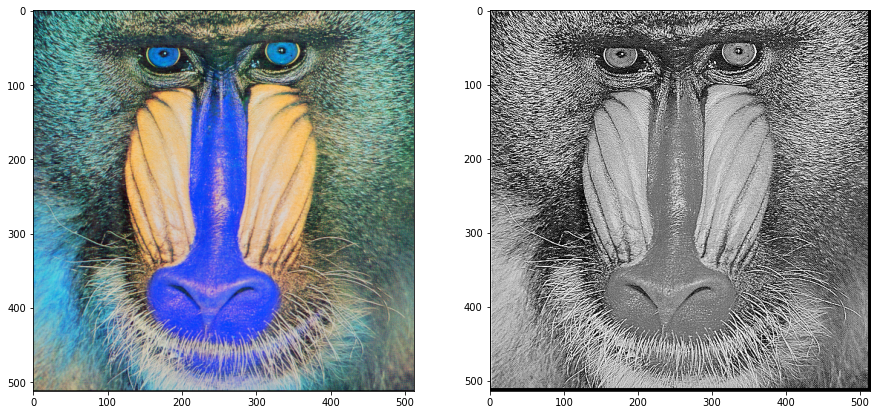

In [130]:
# Output gambar
imageSharpen = im.fromarray(convolution2d(img_gray, kernel_sharpen1, 1, 2))
fig, ax = plt.subplots(1,2, figsize=(15,25))
ax[0].imshow(img)
ax[1].imshow(imageSharpen, cmap='gray')

**Operasi Emboss**

In [131]:
# Menentukan kernel yang akan digunakan
kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

In [132]:
# Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan
convolution2d(img_gray, kernel_emboss, 1, 2)

array([[-290., -257., -154., ...,    0.,    0.,    0.],
       [-377., -229.,  -29., ...,    0.,    0.,    0.],
       [-270., -145.,  317., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

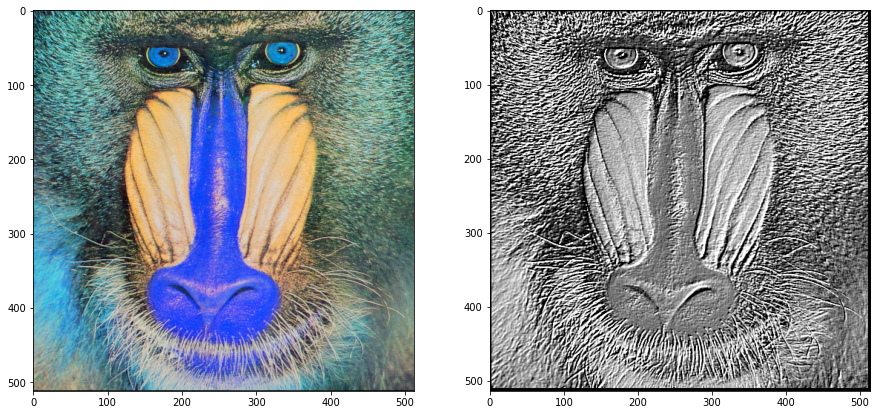

In [133]:
# Output gambar
imageEmboss = im.fromarray(convolution2d(img_gray, kernel_emboss, 1, 2))
fig, ax = plt.subplots(1,2, figsize=(15,25))
ax[0].imshow(img)
ax[1].imshow(imageEmboss, cmap='gray')

**Operasi Left Sobel Edge Detection**

In [134]:
# Menentukan kernel yang akan digunakan
kernel_leftSobel = np.array([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]])

In [135]:
# Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan
convolution2d(img_gray, kernel_leftSobel, 1, 2)

array([[ 145.,   56.,  -96., ...,    0.,    0.,    0.],
       [ 406.,  213., -268., ...,    0.,    0.,    0.],
       [ 454.,  372., -279., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

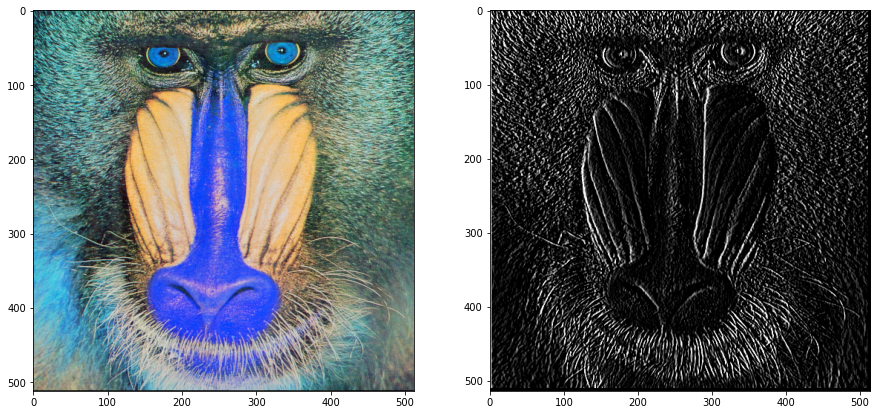

In [136]:
# Output gambar
imageleftSobel = im.fromarray(convolution2d(img_gray, kernel_leftSobel, 1, 2))
fig, ax = plt.subplots(1,2, figsize=(15,25))
ax[0].imshow(img)
ax[1].imshow(imageleftSobel, cmap='gray')

**Operasi Canny Edge Detection**

In [137]:
# Menentukan kernel yang akan digunakan
kernel_canny = np.array([[-1, -1, -1],
                         [-1, 8, -1],
                         [-1, -1, -1]])

In [138]:
# Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan
convolution2d(img_gray, kernel_canny, 1, 2)

array([[-145., -201., -250., ...,    0.,    0.,    0.],
       [-261.,  887.,   -3., ...,    0.,    0.,    0.],
       [-338.,  435.,  165., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

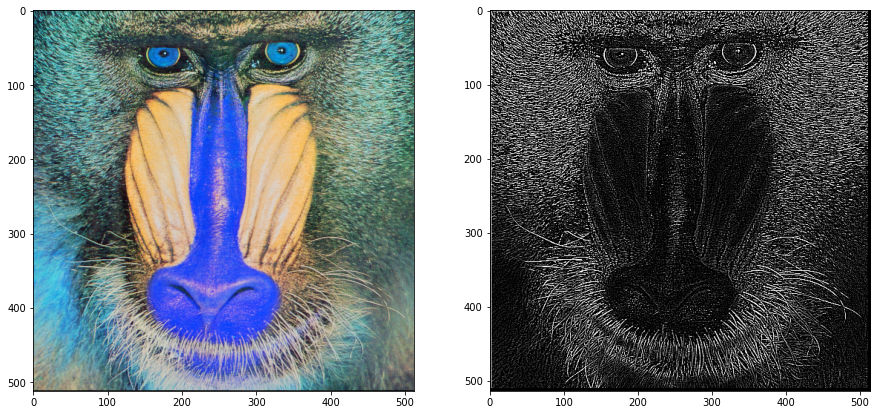

In [139]:
# Output gambar
imageCanny = im.fromarray(convolution2d(img_gray, kernel_canny, 1, 2))
fig, ax = plt.subplots(1,2, figsize=(15,25))
ax[0].imshow(img)
ax[1].imshow(imageCanny, cmap='gray')

**Operasi 21x21 Gaussian Blur**

In [140]:
kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @gaussian_kernel.transpose()

In [141]:
# Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan
convolution2d(img_gray, gauss_kernel, 1, 2)

array([[86.48659427, 89.2361745 , 91.42377732, ...,  0.        ,
         0.        ,  0.        ],
       [88.31614999, 91.3455659 , 93.80982986, ...,  0.        ,
         0.        ,  0.        ],
       [89.29884955, 92.54506201, 95.24211129, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

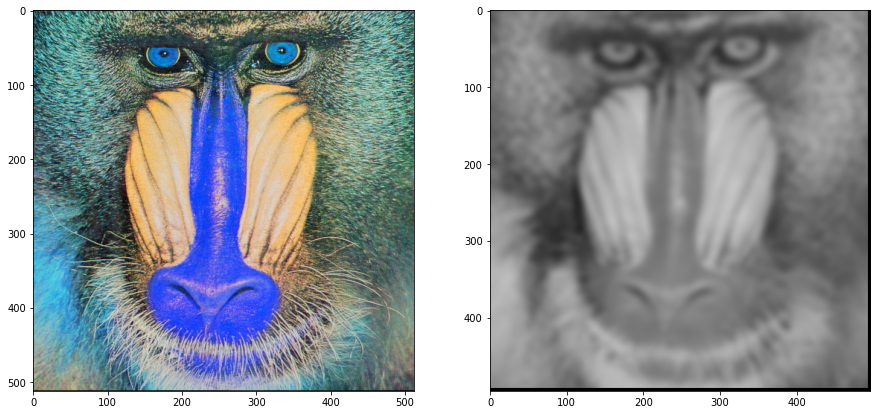

In [142]:
# Output gambar
imageGaussian21 = im.fromarray(convolution2d(img_gray, gauss_kernel, 1, 2))
fig, ax = plt.subplots(1,2, figsize=(15,25))
ax[0].imshow(img)
ax[1].imshow(imageGaussian21, cmap='gray')

#----- ***FINISH***-----